In [ ]:
Assignment 5: Traffic Sign Recognition
Dataset: German Traffic Sign Recognition Benchmark (GTSRB) (43 traffic sign classes)
Task:
 Build a CNN model to classify traffic signs.
Preprocess the images (resize, normalize).
Train the model and evaluate performance.
Expected Outcomes:
Achieve at least 95% accuracy.
Display a confusion matrix .

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 612M/612M [01:14<00:00, 8.58MB/s]

Extracting files...


Path to dataset files: C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [59]:
train_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train"
#valid_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Meta"
test_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1"

In [60]:
# Set Image Directory
import os
image_dir = train_path
# Extract class names
class_names = sorted(os.listdir(image_dir))

# Number of Images
n_images = [len(os.listdir(os.path.join(image_dir, name))) for name in class_names]

print(f'Class Names: {class_names}')

print(f'No of images per class: {n_images}')

Class Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
No of images per class: [210, 2220, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 2250, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 1410, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 1980, 360, 240, 240, 1860, 420, 1440, 1410, 1470]


In [61]:
# Set some constants
n_train_images = 10000
n_test_images = 1000

# Create Training & Testing Directories
train_dir, test_dir = './train_dir', './valid_dir'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy Images from OG location to Target Location
for name in class_names:

    # Make Sure Sub Directory Exists for Training
    dest_train_dir = os.path.join(train_dir, name)
    os.makedirs(dest_train_dir, exist_ok=True)

    # Load Input Image Paths for Training
    train_image_paths = sorted(glob(os.path.join(image_dir, name, "*")))[:n_train_images]

    # Copy the images for Training
    for image_path in tqdm(train_image_paths):
        try:
            # Load the image to ensure it is valid
            Image.open(image_path)
            target_path = os.path.join(dest_train_dir, os.path.basename(image_path))
            shutil.copy(image_path, target_path)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

# Copy Images from OG location to Target Location for Testing
for name in class_names:
    
    # Make Sure Sub Directory Exists for Testing
    dest_test_dir = os.path.join(test_dir, name)
    os.makedirs(dest_test_dir, exist_ok=True)

    # Load Input Image Paths for Testing
    test_image_paths = sorted(glob(os.path.join(image_dir, name, "*")))[n_train_images:n_train_images+n_test_images]

    # Copy the images for Testing
    for image_path in tqdm(test_image_paths):
        try:
            # Load the image to ensure it is valid
            Image.open(image_path)
            target_path = os.path.join(dest_test_dir, os.path.basename(image_path))
            shutil.copy(image_path, target_path)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

NameError: name 'glob' is not defined

In [62]:
train_dir, test_dir = './train_dir', './valid_dir'

In [63]:
# Initialize Image Data Generator
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
data_generator = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.1
)

# Load Training Data
train_data = data_generator.flow_from_directory(
    train_dir,
    target_size=(32,32),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    subset='training',
    seed=42
)

# Load Validation Data
valid_data = data_generator.flow_from_directory(
    image_dir,
    target_size=(32,32),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    subset='validation',
    seed=42
)


Found 35289 images belonging to 43 classes.
Found 3920 images belonging to 43 classes.


In [64]:
aug=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomFlip('vertical')
    ]
)

In [73]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax') # 43 classes
])

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 128)      

In [79]:
history=model.fit(train_data,epochs=15,batch_size=32,validation_data=valid_data,verbose=2)

Epoch 1/15
1103/1103 - 20s - loss: 1.5205 - accuracy: 0.5554 - val_loss: 0.6140 - val_accuracy: 0.8334 - 20s/epoch - 18ms/step
Epoch 2/15
1103/1103 - 18s - loss: 0.2719 - accuracy: 0.9162 - val_loss: 0.4611 - val_accuracy: 0.8758 - 18s/epoch - 16ms/step
Epoch 3/15
1103/1103 - 16s - loss: 0.1345 - accuracy: 0.9591 - val_loss: 0.3418 - val_accuracy: 0.9128 - 16s/epoch - 15ms/step
Epoch 4/15
1103/1103 - 18s - loss: 0.0895 - accuracy: 0.9724 - val_loss: 0.3009 - val_accuracy: 0.9204 - 18s/epoch - 16ms/step
Epoch 5/15
1103/1103 - 16s - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.1999 - val_accuracy: 0.9505 - 16s/epoch - 15ms/step
Epoch 6/15
1103/1103 - 18s - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.2483 - val_accuracy: 0.9306 - 18s/epoch - 16ms/step
Epoch 7/15
1103/1103 - 16s - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.3723 - val_accuracy: 0.9227 - 16s/epoch - 15ms/step
Epoch 8/15
1103/1103 - 16s - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.3396 - val_accuracy: 0.9237 - 16s/ep

In [80]:
class_mapping = train_data.class_indices
print("Class Mapping:", class_mapping)

Class Mapping: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [89]:
import os

test_dir = r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test"

# Check if the directory exists
if not os.path.exists(test_dir):
    print(f"Directory does not exist: {test_dir}")
else:
    print(f"Directory exists: {test_dir}")


Directory exists: C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test


In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the test CSV file
test_df = pd.read_csv(r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test.csv")

# Ensure the Path column has correct paths
test_df["Path"] = test_df["Path"].apply(lambda x: "C:/Users/Saswata Maity/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/" + x)
# Convert labels to string format
test_df["ClassId"] = test_df["ClassId"].astype(str)

# Define ImageDataGenerator (no data augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test images using flow_from_dataframe
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Path",      # Column containing image file paths
    y_col="ClassId",   # Column containing labels
    target_size=(64, 64),  # Resize images to match model input size
    batch_size=32,
    class_mode="categorical",  # Use "categorical" for multi-class classification
    shuffle=False  # Keep order for evaluation
)

# Print class indices
print("Test Generator Labels:", test_generator.class_indices)


Found 12630 validated image filenames belonging to 43 classes.
Test Generator Labels: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [92]:
import pandas as pd

# Define the path to the CSV file
csv_path = r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test.csv"

# Load the CSV file
test_df = pd.read_csv(csv_path)

# Display the first few rows to understand its structure
print(test_df.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [98]:
# Update the 'Path' column to contain absolute paths
test_df['Path'] = test_df['Path'].apply(lambda x: os.path.join(test_data_dir, x))


In [99]:
# Initialize the ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create the test generator using the dataframe
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Path',
    y_col='ClassId',
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Found 12630 validated image filenames belonging to 43 classes.


Images batch shape: (32, 32, 32, 3)
Labels batch shape: (32,)


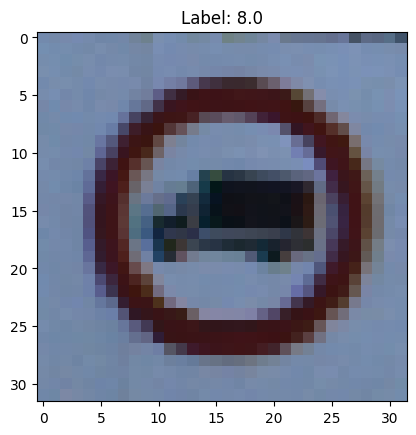

In [100]:
# Fetch a batch of images and labels
images, labels = next(test_generator)

# Display the shape of the images and labels
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")

# Optionally, visualize the first image and its label
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()


In [106]:
loss,acc=model.evaluate(test_generator)

395/395 [==============================] - 15s 39ms/step - loss: 0.2311 - accuracy: 0.9560


In [107]:
print(f'Model accuracy : {acc*100 :.2f} %')

Model accuracy : 95.60 %


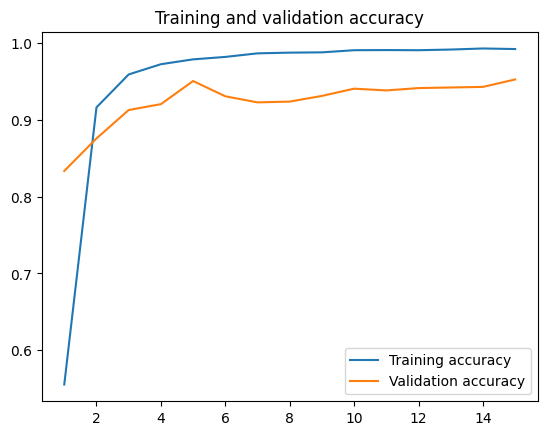

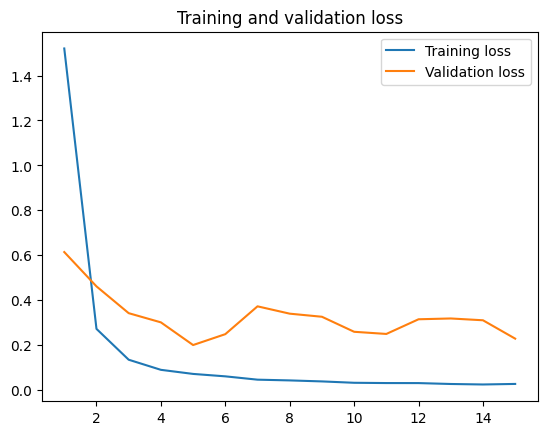

In [108]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [109]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from the test data
y_true = test_generator.classes

# Get model predictions (probabilities) and convert to class labels
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

395/395 [==============================] - 15s 38ms/step
Confusion Matrix:
[[ 55   0   0 ...   0   5   0]
 [  1 708   0 ...   0   0   0]
 [  0   0 652 ...   0   0   0]
 ...
 [  0   0   0 ... 414   9   0]
 [  0   0   0 ...   2 436   0]
 [  0   0   0 ...   0   0 479]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.98      0.98      0.98       720
           2       1.00      0.99      0.99       660
           3       0.98      0.95      0.96       420
           4       0.97      0.95      0.96       690
           5       0.99      0.99      0.99       720
           6       1.00      0.97      0.99       270
           7       0.96      1.00      0.98       210
           8       0.97      1.00      0.98       150
           9       0.98      0.94      0.96       360
          10       0.96      0.83      0.89       390
          11       0.86      1.00      0.92        60
       